This notebook looks at the fits for the run where we fixed $\lambda_{turn}=50$ $\mu$m, $\beta=1.8$, and $T_{dust}=25 K$. All of the sources fit in this way only had 3 undetected points, usually the SPIRE PLW, PMW. and PSW bands.

In [1]:
#Import modules and set plotting to be inside the notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from glob import glob
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
#Make sure the path to the modeling modules is in the PythonPath
import sys
sys.path.append('/ricci9nb/tshimizu/Github/bat-agn-sed-fitting/')

In [3]:
# Get all of the pickle files in the directory
pickle_files = glob('../casey_bayes_results/wturn_fixed50_beta_fixed1_8_tdust_fixed25/pickles/*.pickle')
pickle_files

['../casey_bayes_results/wturn_fixed50_beta_fixed1_8_tdust_fixed25/pickles/ESO121-IG028_casey_bayes_wturn_fixed50_beta_fixed1_8_tdust_fixed25.pickle',
 '../casey_bayes_results/wturn_fixed50_beta_fixed1_8_tdust_fixed25/pickles/2MASXJ05020903+0331499_casey_bayes_wturn_fixed50_beta_fixed1_8_tdust_fixed25.pickle',
 '../casey_bayes_results/wturn_fixed50_beta_fixed1_8_tdust_fixed25/pickles/IGRJ11366-6002_casey_bayes_wturn_fixed50_beta_fixed1_8_tdust_fixed25.pickle',
 '../casey_bayes_results/wturn_fixed50_beta_fixed1_8_tdust_fixed25/pickles/2MASXJ01064523+0638015_casey_bayes_wturn_fixed50_beta_fixed1_8_tdust_fixed25.pickle',
 '../casey_bayes_results/wturn_fixed50_beta_fixed1_8_tdust_fixed25/pickles/MCG-02-02-095_casey_bayes_wturn_fixed50_beta_fixed1_8_tdust_fixed25.pickle',
 '../casey_bayes_results/wturn_fixed50_beta_fixed1_8_tdust_fixed25/pickles/IRAS05078+1626_casey_bayes_wturn_fixed50_beta_fixed1_8_tdust_fixed25.pickle',
 '../casey_bayes_results/wturn_fixed50_beta_fixed1_8_tdust_fixed25/pi

In [5]:
# Loop over all of the files and pull out the best-fit parameters for each source
fit_data = pd.DataFrame(columns=['logMdust', 'Tdust', 'beta', 'logNpl', 'alpha', 'wturn'])
for f in pickle_files:
    name = f.split('/')[-1].split('_')[0]
    src_file = open(f, 'rb')
    data = pickle.load(src_file)
    fit_data.loc[name] = data['best_fit_model'].parameters

In [6]:
# We can take a look at the DataFrame to make sure everything looks ok.
fit_data

,logMdust,Tdust,beta,logNpl,alpha,wturn
ESO121-IG028,6.904543,25,1.8,-0.778789,1.653802,50
2MASXJ05020903+0331499,5.740371,25,1.8,-1.151631,1.162263,50
IGRJ11366-6002,6.614663,25,1.8,0.088893,2.121122,50
2MASXJ01064523+0638015,6.162306,25,1.8,-0.325354,1.606822,50
MCG-02-02-095,5.781206,25,1.8,-0.953136,1.324900,50
IRAS05078+1626,6.471560,25,1.8,0.519380,1.729828,50
IC2921,6.653266,25,1.8,-0.886342,0.642838,50
WKK6471,6.501898,25,1.8,-1.256312,0.373353,50
ESO479-G031,5.847969,25,1.8,-0.929306,1.720085,50
2MASXJ04440903+2813003,6.584119,25,1.8,-0.427204,0.985636,50


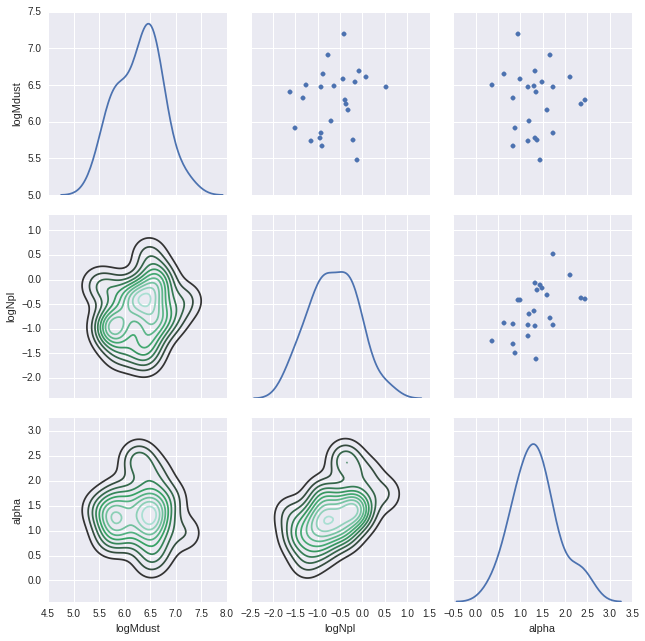

In [8]:
# Let's plot the pairwise relationship between all of the best fit parameters to see if there are any correlations
# between them.
fig = sns.PairGrid(fit_data, vars=['logMdust', 'logNpl', 'alpha'])
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot)
fig.map_diag(sns.kdeplot, legend=False)

There are only 24 sources in this group so there isn't a lot we can say from the PairGrid. $alpha$ and logNpl are correlated pretty well. $\log M_{dust}$ seems to be much lower than in the other groups as well. This could be an indication that we are getting into sources that are primarily dominated by the AGN and so there isn't a lot of heated dust from star formation.

In [9]:
fit_data.describe(percentiles=[0.025, 0.16, 0.50, 0.84, 0.975])

,logMdust,Tdust,beta,logNpl,alpha,wturn
count,24.000000,24,24.0,24.000000,24.000000,24
mean,6.280845,25,1.8,-0.645500,1.343991,50
std,0.428436,0,0.0,0.530267,0.505485,0
min,5.474931,25,1.8,-1.631379,0.373353,50
2.5%,5.590933,25,1.8,-1.556458,0.528306,50
16%,5.773778,25,1.8,-1.185129,0.865821,50
50%,6.362750,25,1.8,-0.675190,1.320758,50
84%,6.627016,25,1.8,-0.149325,1.723203,50
97.5%,7.027606,25,1.8,0.271850,2.396925,50
max,7.194102,25,1.8,0.519380,2.448923,50


Based on the statistics from this fitting run, things seem to have shifted a little bit. Median $M_{dust}$ decreased by about 0.6 dex from 7.0 to 6.4 and $\alpha$ decreased from 1.6 to 1.3.

I want to make a list of sources that I think are probably going to warrant a re-fit using different fixed parameters. We most likely need to adjust the turnover wavelength or possibly let it be free and fix dust temperature.
* 2MASXJ03305218+0538253
* 2MASXJ05020903+0331499
* ESO121-IG028
* IC 2921
* WKK6471
